In [359]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy.random as rd

In [360]:
hd = ('SequenceName','mcg','gvh','lip','chg','aac','alm1','alm2','ClassDistribution')

df = pd.read_csv("ecoli.data", sep='\s+', names= hd)
print(df)

    SequenceName   mcg   gvh   lip  chg   aac  alm1  alm2 ClassDistribution
0      AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35                cp
1     ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44                cp
2     ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46                cp
3     ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36                cp
4      ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35                cp
..           ...   ...   ...   ...  ...   ...   ...   ...               ...
331   TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30                pp
332   UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32                pp
333   USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38                pp
334   XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37                pp
335   YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52                pp

[336 rows x 9 columns]


In [361]:
col = [['cp',
  'im',
  'pp',
  'imU',
  'om',
  'omL',
  'imL',
  'imS']]

df2 = df.iloc[:,1:]
data = df2.to_numpy()
print(data)
rd.shuffle(data)
print(data)
col = np.asarray(col).reshape(1,8)
vals = data[:,-1:].reshape(336,1)
matrix = np.zeros((336,8))
for i in range(vals.shape[0]):
  for j in range(col.shape[1]):
    if(col[0,j] == vals[i,0]):
      matrix[i,j] = 1
      break


print(matrix)




[[0.49 0.29 0.48 ... 0.24 0.35 'cp']
 [0.07 0.4 0.48 ... 0.35 0.44 'cp']
 [0.56 0.4 0.48 ... 0.37 0.46 'cp']
 ...
 [0.61 0.6 0.48 ... 0.39 0.38 'pp']
 [0.59 0.61 0.48 ... 0.42 0.37 'pp']
 [0.74 0.74 0.48 ... 0.53 0.52 'pp']]
[[0.68 0.76 0.48 ... 0.45 0.27 'om']
 [0.33 0.45 0.48 ... 0.88 0.89 'im']
 [0.36 0.56 0.48 ... 0.45 0.53 'cp']
 ...
 [0.75 0.37 0.48 ... 0.7 0.74 'imU']
 [0.21 0.51 0.48 ... 0.32 0.41 'cp']
 [0.35 0.34 0.48 ... 0.3 0.27 'cp']]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [362]:
X = data[:round(data.shape[0]*0.666),:-1].astype(np.float32)
Y = matrix[:round(data.shape[0]*0.666),:].astype(np.float32)
Xt = data[round(data.shape[0]*0.666)+1:,:-1].astype(np.float32)
Yt = matrix[round(data.shape[0]*0.666)+1:,:].astype(np.float32)
X_m = np.mean(X,axis=0)
Xt_m = np.mean(Xt,axis=0)
X_s = np.std(X,axis =0)
Xt_s = np.std(Xt,axis =0)


Xn = (X-X_m)/X_s
Xtn = (Xt-Xt_m)/Xt_s

#variation in column 4, is 0. So I remove it
Xn = np.delete(Xn,3,1)
Xtn = np.delete(Xtn,3,1)

inputs = torch.from_numpy(Xn)
inputs_test = torch.from_numpy(Xtn)

targets = torch.from_numpy(Y)
targets_test = torch.from_numpy(Yt)


/tmp/ipykernel_297181/2742568034.py:12: RuntimeWarning: invalid value encountered in divide
  Xtn = (Xt-Xt_m)/Xt_s


In [363]:
model = nn.Sequential(
  nn.Linear(6,15),
  nn.ReLU(),
  nn.Linear(15,8)
)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())


In [364]:
n_epochs = 1000

train_losses = []
test_losses = []

for it in range(n_epochs):
  optimizer.zero_grad()
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.item())

  out_test = model(inputs_test)
  loss_test = criterion(out_test, targets_test)
  loss_test.backward()
  test_losses.append(loss_test.item())
  print(f'Epoch {it+1}/{n_epochs}, Train Losses: {loss.item():.4f}, Test Losses: {loss_test.item():.4f}')


Epoch 1/1000, Train Losses: 2.1681, Test Losses: 2.1413
Epoch 2/1000, Train Losses: 2.1610, Test Losses: 2.1340
Epoch 3/1000, Train Losses: 2.1541, Test Losses: 2.1266
Epoch 4/1000, Train Losses: 2.1471, Test Losses: 2.1194
Epoch 5/1000, Train Losses: 2.1403, Test Losses: 2.1122
Epoch 6/1000, Train Losses: 2.1334, Test Losses: 2.1050
Epoch 7/1000, Train Losses: 2.1266, Test Losses: 2.0979
Epoch 8/1000, Train Losses: 2.1199, Test Losses: 2.0908
Epoch 9/1000, Train Losses: 2.1132, Test Losses: 2.0838
Epoch 10/1000, Train Losses: 2.1066, Test Losses: 2.0768
Epoch 11/1000, Train Losses: 2.1000, Test Losses: 2.0699
Epoch 12/1000, Train Losses: 2.0934, Test Losses: 2.0630
Epoch 13/1000, Train Losses: 2.0869, Test Losses: 2.0562
Epoch 14/1000, Train Losses: 2.0804, Test Losses: 2.0494
Epoch 15/1000, Train Losses: 2.0739, Test Losses: 2.0427
Epoch 16/1000, Train Losses: 2.0675, Test Losses: 2.0361
Epoch 17/1000, Train Losses: 2.0612, Test Losses: 2.0294
Epoch 18/1000, Train Losses: 2.0548, Tes

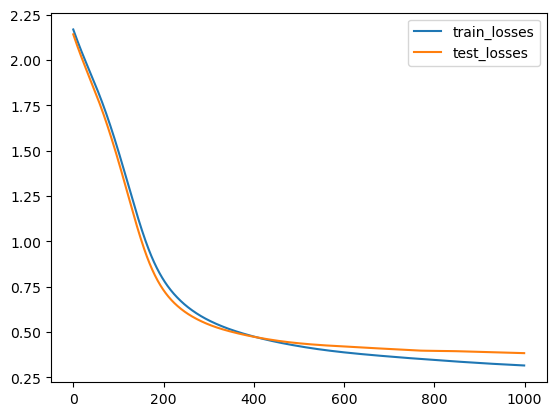

In [365]:
plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()
plt.show()

In [366]:
n_correct = 0
n_total = 0
_, targetsIndex = torch.max(targets, 1)
outputs = model(inputs)
_, predictions = torch.max(outputs,1)
n_correct += (predictions == targetsIndex).sum().item()
n_total += targetsIndex.shape[0]

train_acc = n_correct/n_total
print(train_acc)

n_correct = 0
n_total = 0
_, targetsIndex = torch.max(targets_test, 1)
outputs = model(inputs_test)
_, predictions = torch.max(outputs,1)
n_correct += (predictions == targetsIndex).sum().item()
n_total += targetsIndex.shape[0]

test_acc = n_correct/n_total
print(test_acc)




0.8660714285714286
0.8738738738738738
